<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Finding_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset


In [3]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


**Steps:**
- Plot a histogram: Visualize how compensation is distributed.
- Plot a KDE (Kernel Density Estimate) curve: Smoothen the distribution for better insights.
- Apply log transformation (if needed): Compensation data is often right-skewed; log transformation can help.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


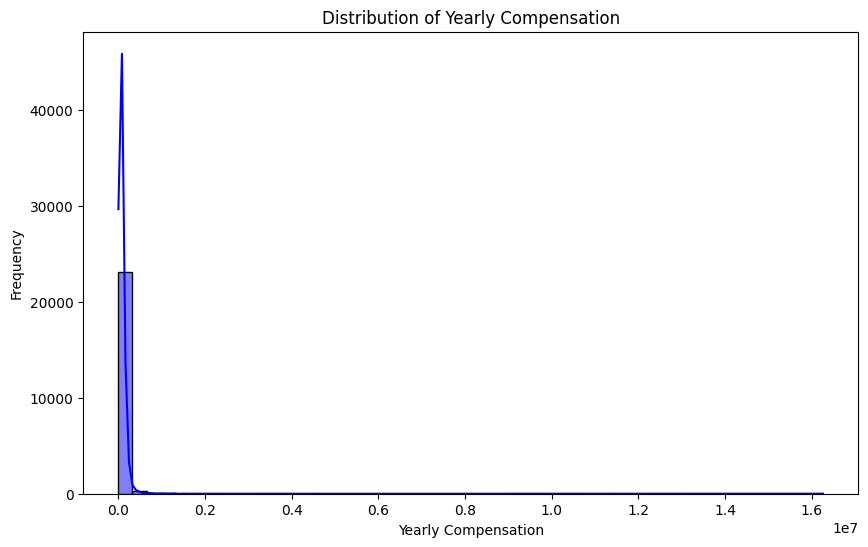

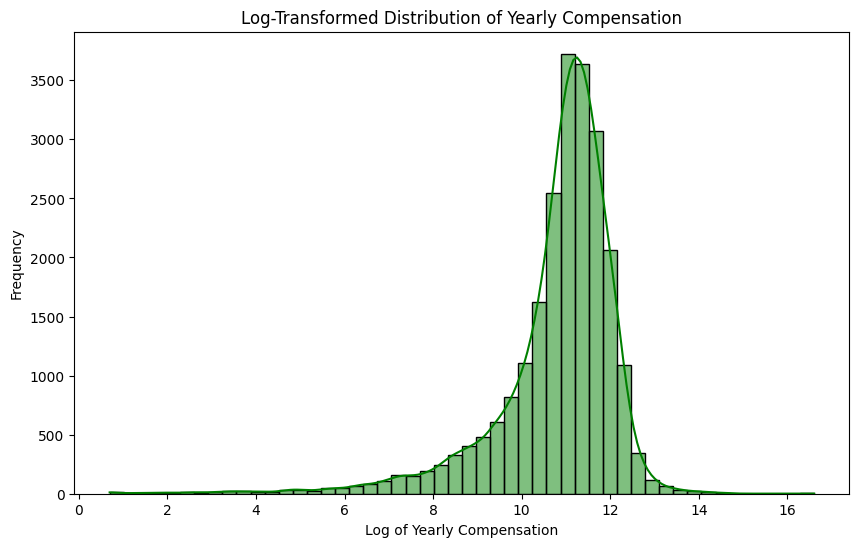

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Check column names
print(df.columns)

# Assuming 'ConvertedCompYearly' is the correct column (adjust if necessary)
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[comp_col].notna()]

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df[comp_col], bins=50, kde=True, color="blue")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Yearly Compensation")
plt.show()

# Apply log transformation to handle skewness
df['Log_ConvertedCompYearly'] = np.log1p(df[comp_col])

# Plot histogram of log-transformed compensation
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_ConvertedCompYearly'], bins=50, kde=True, color="green")
plt.xlabel("Log of Yearly Compensation")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Yearly Compensation")
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."

**Steps:**
- Filter the DataFrame to include only respondents with EmploymentStatus as "Employed, full-time".
- Calculate the median compensation from ConvertedCompYearly.

In [7]:
import pandas as pd

# Load data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Check column names
print(df.columns)

# Assuming 'EmploymentStatus' is the correct column name (adjust if necessary)
employment_col = 'Employment'
comp_col = 'ConvertedCompYearly'

# Filter data for full-time employees
df_full_time = df[df[employment_col] == "Employed, full-time"]

# Calculate median compensation
median_comp = df_full_time[comp_col].median()

# Display result
print(f"Median Yearly Compensation for Full-Time Employees: {median_comp:.2f}")


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Median Yearly Compensation for Full-Time Employees: 69814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



**Steps:**
- Filter the dataset to remove missing values in ConvertedCompYearly and Country.
- Group data by country and visualize compensation distributions using a box plot.
- Identify anomalies and variations in compensation trends.


<ipython-input-8-8391500d3fd2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_top_countries[country_col], y=df_top_countries[comp_col], showfliers=False, palette="coolwarm")


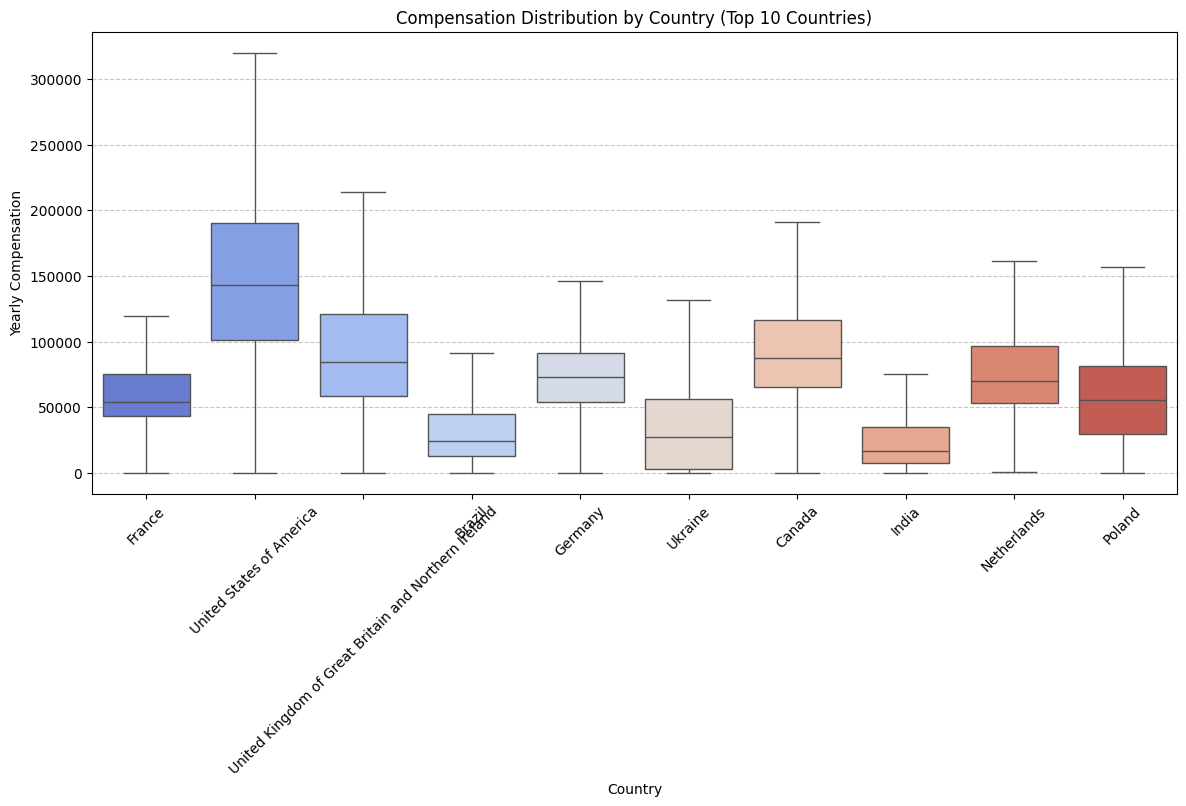

In [8]:

# Assuming 'Country' and 'ConvertedCompYearly' are correct column names (adjust if necessary)
country_col = 'Country'
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[country_col].notna() & df[comp_col].notna()]

# Select top 10 countries by response count for better visualization
top_countries = df[country_col].value_counts().head(10).index
df_top_countries = df[df[country_col].isin(top_countries)]

# Plot boxplot for compensation by country
plt.figure(figsize=(14, 6))
sns.boxplot(x=df_top_countries[country_col], y=df_top_countries[comp_col], showfliers=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Yearly Compensation")
plt.title("Compensation Distribution by Country (Top 10 Countries)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


**Steps:**
- Compute the IQR (Interquartile Range) to determine the lower and upper bounds.
- Filter out outliers by keeping only values within the bounds.
Create a new DataFrame without outliers for further analysis.


In [9]:

# Assuming 'ConvertedCompYearly' is the correct column name (adjust if necessary)
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[comp_col].notna()]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[comp_col].quantile(0.25)
Q3 = df[comp_col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create a new DataFrame without outliers
df_refined = df[(df[comp_col] >= lower_bound) & (df[comp_col] <= upper_bound)]

# Validate the size of the new dataset
print(f"Original Dataset Size: {df.shape[0]} rows")
print(f"Refined Dataset Size (Without Outliers): {df_refined.shape[0]} rows")
print(f"Rows Removed: {df.shape[0] - df_refined.shape[0]}")

# Display first few rows of the refined dataset
df_refined.head()


Original Dataset Size: 23435 rows
Refined Dataset Size (Without Outliers): 22457 rows
Rows Removed: 978


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


**Steps:**
- Calculate the correlation between the selected columns.
- Visualize the correlation matrix using a heatmap.


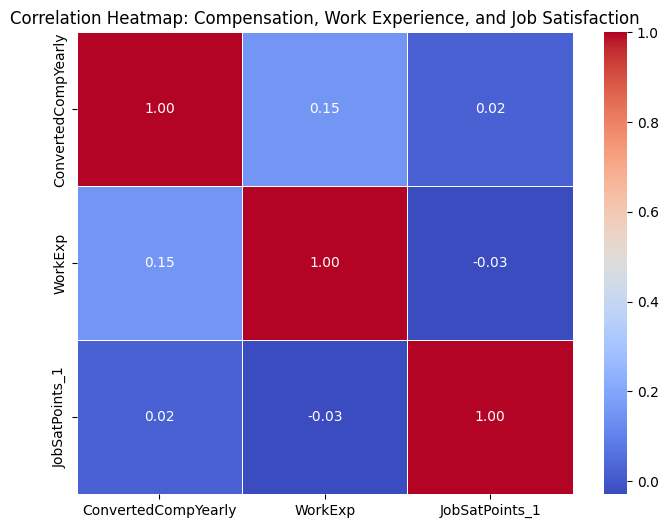

In [10]:

# Assuming 'ConvertedCompYearly', 'WorkExp', and 'JobSatPoints_1' are the correct columns (adjust if necessary)
comp_col = 'ConvertedCompYearly'
exp_col = 'WorkExp'
sat_col = 'JobSatPoints_1'

# Drop rows with missing values in the selected columns
df_filtered = df[[comp_col, exp_col, sat_col]].dropna()

# Calculate correlation matrix
correlation_matrix = df_filtered.corr()

# Plot heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction")
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>

**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


**Steps:**
- Plot scatter plots for the two specified pairs of variables:
 - ConvertedCompYearly vs. WorkExp: Examining how compensation varies with work experience.
 -ConvertedCompYearly vs. JobSatPoints_1: Analyzing if there’s any relationship between compensation and job satisfaction.


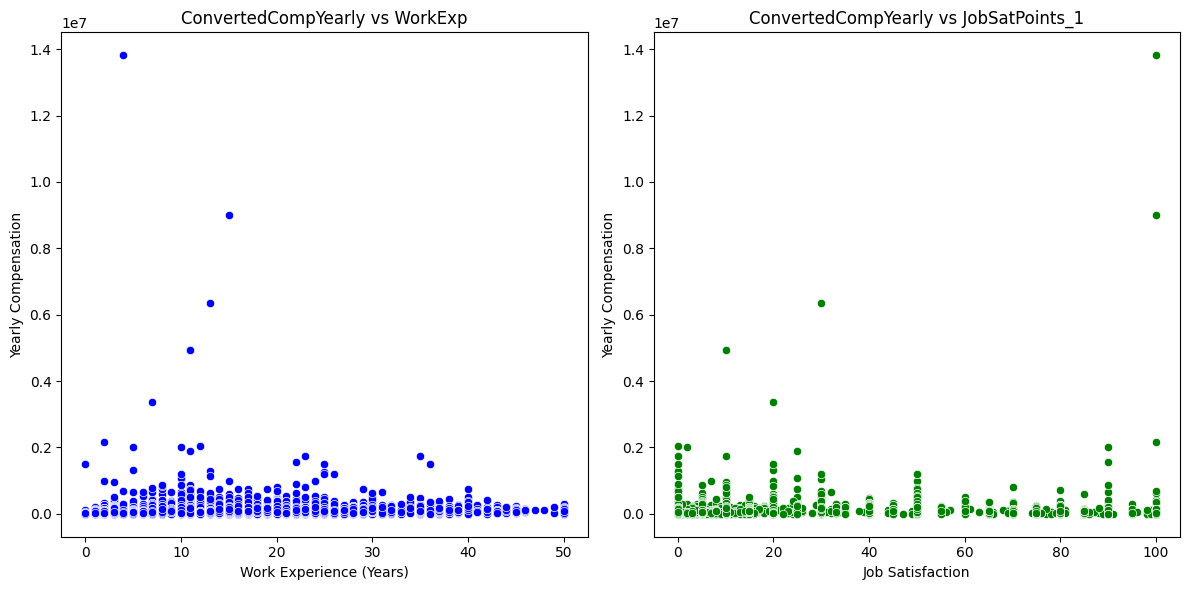

In [11]:


# Assuming 'ConvertedCompYearly', 'WorkExp', and 'JobSatPoints_1' are the correct columns (adjust if necessary)
comp_col = 'ConvertedCompYearly'
exp_col = 'WorkExp'
sat_col = 'JobSatPoints_1'

# Drop rows with missing values in the selected columns
df_filtered = df[[comp_col, exp_col, sat_col]].dropna()

# Create scatter plot: Compensation vs Work Experience
plt.figure(figsize=(12, 6))

# Scatter plot: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_filtered[exp_col], y=df_filtered[comp_col], color='blue')
plt.title(f"{comp_col} vs {exp_col}")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation")

# Scatter plot: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_filtered[sat_col], y=df_filtered[comp_col], color='green')
plt.title(f"{comp_col} vs {sat_col}")
plt.xlabel("Job Satisfaction")
plt.ylabel("Yearly Compensation")

# Display the plots
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.
